Sprintg 22 | Exam 2 | Hands-on Activities


*   Each student MUST implement **Python code as their responses** for all hands-on activities.  That's how each activity will be graded.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request, urllib.parse, urllib.error, json
import pandas as pd
import requests
import re


[1][10 Points] Create a new DataFrame (**df**) from the provided dataset, **salaries-14B.csv**.  The **df** should only contain a subset of data from the csv file, and it will be utilized by a set of the subsequence questions.
*   The **df** should contain only 500 rows and columns of intormation from the data file (NOT the entire file).  
*   Your data (rows of information) should be similar, but it **will most likely not** match my extracted data (as shown).  

In [3]:
# STU TODO: Create a new df as specified by -
# + import (only) a subset of data (500 rows of ID, Title, Pay, Other Pay, Benefits and Employment) from the csv data file
# + display the info


df = pd.read_csv("salaries-14B.csv").head(500)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            500 non-null    int64  
 1   Title         500 non-null    object 
 2   Pay           500 non-null    float64
 3   OT Pay        500 non-null    float64
 4   Other Pay     500 non-null    float64
 5   Benefits      500 non-null    float64
 6   Compensation  500 non-null    float64
 7   Employment    500 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 31.4+ KB


[2][10 Points] Compute the total pay of each "person (ID)".  Total Pay = Pay + Other Pay.



In [4]:
#
# STU To Do: Create a new colum ToTal Pay = Pay + Other Pay
#
total_pay = df["Pay"] + df["Other Pay"]
df["total_pay"] = total_pay
df.head()

,ID,Title,Pay,OT Pay,Other Pay,Benefits,Compensation,Employment,total_pay
0,110532,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,510732.68,PT,471952.64
1,110533,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,479652.21,HOURLY,379399.03
2,110534,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,436224.36,PT,339653.70
3,110535,Chief of Police,307450.04,0.00,19266.72,91302.46,418019.22,FT,326716.76
4,110536,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,417435.10,FT,326233.44


[3][10 Points] Create the following chart using the **df**.  Blue represents the Total Pay, while Orange represents the Benefits.  (Your colors can be different).  Be sure to specify the chart title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


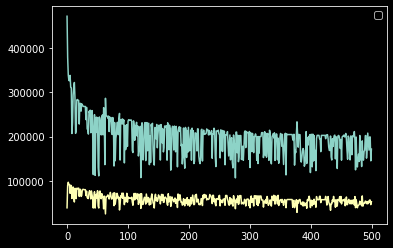

In [5]:
# STU To Do: Implement your logic 
fig, ax = plt.subplots()
ax.plot(df["total_pay"])
ax.plot(df["Benefits"])
ax.legend()

plt.show()

[4][10 Points] What are the **seven highest Total Pays**? (Yours does not have to match my findings).  

In [6]:
# STU To Do: Implement your logic (Your )
sorted_df = df.sort_values(["total_pay"], ascending=False).head(7)
sorted_df


,ID,Title,Pay,OT Pay,Other Pay,Benefits,Compensation,Employment,total_pay
0,110532,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,510732.68,PT,471952.64
1,110533,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,479652.21,HOURLY,379399.03
2,110534,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,436224.36,PT,339653.70
5,110537,Asst Med Examiner,270222.04,6009.22,67956.20,71580.48,415767.94,HOURLY,338178.24
3,110535,Chief of Police,307450.04,0.00,19266.72,91302.46,418019.22,FT,326716.76
4,110536,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,417435.10,FT,326233.44
12,110544,Commander 3,184734.01,0.00,137409.09,51940.39,374083.49,PT,322143.10


[5][10 Points] Create the following bar chart for the **seven highest Total Pays**.

Text(0, 0.5, 'Total Pay')

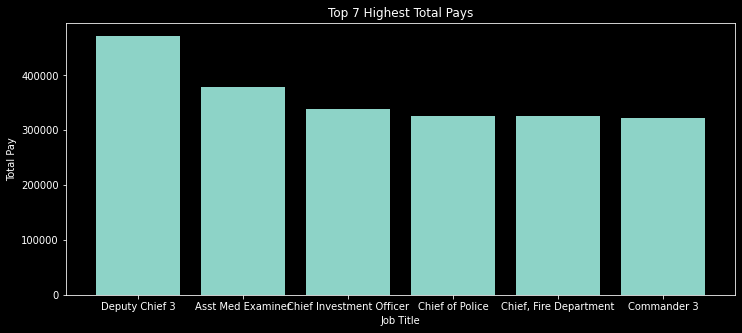

In [7]:
# STU To Do: Implement your logic 

fig, ax = plt.subplots(figsize=(12,5))  # Set size/spacing for subplots (x,y) in matplotlib

# Plot with bar()
ax.bar(sorted_df["Title"], sorted_df["total_pay"])

# Set x and y axes labels, legend, and title
ax.set_title("Top 7 Highest Total Pays")
ax.set_xlabel("Job Title")
ax.set_ylabel("Total Pay")



[6][10 Points] What are the Employment status (of your dataset)?

In [8]:
# STU To Do: Implement your logic 
# Your percentage of FT, PT and HOURLY will be different
employment_status = df.groupby(["Employment"]).count()[["Title"]]
# employment_status.describe()["ID"][["count"]]  # Another way
employment_status = employment_status.reset_index() # To make the header fixed
employment_status

,Employment,Title
0,FT,403
1,HOURLY,70
2,PT,27


[7][10 Points] Create the following pie chart representing the Employment Status

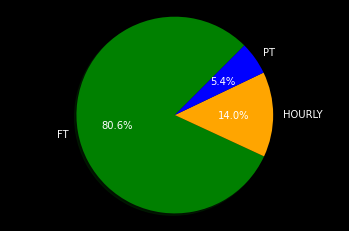

In [9]:
  # STU To Do: Implement your logic 
  # Note: My labels are incorrect.  Did not have a chance to fix it.

fig, ax = plt.subplots()
ax.pie(employment_status["Title"].tolist(), labels=employment_status["Employment"].tolist(), colors=["green", "orange", "blue"], autopct='%1.1f%%',
        shadow=True, startangle=45)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

[8][10 Points] Create a Histogram representing the Benefits between \$10,000 and \$100,000

Text(0, 0.5, 'Frequency')

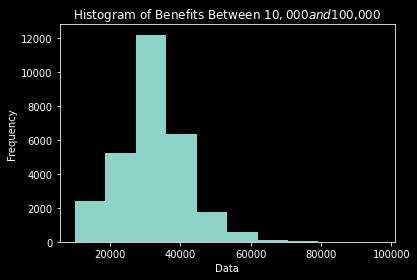

In [10]:
# STU To Do: Implement your logic 
df = pd.read_csv("salaries-14B.csv")

benefit_selection = (10000,100000)
mask = df['Benefits'].between(*benefit_selection)
new_data = df[mask][["Benefits"]]


plt.hist(new_data)
plt.title('Histogram of Benefits Between $10,000 and $100,000')
plt.xlabel('Data')
plt.ylabel('Frequency')


Part B -- UMD API:
Check out the following URL to learn more about the UMD API
*   https://beta.umd.io/
*   



[9][10 Points] Display all of the COMM courses that Professor Aaron Hood has taught (and will be teaching)?

In [11]:
# STU To Do: Implement your logic 

professors = 'https://api.umd.io/v1/professors'

response = requests.get(professors)     # Get 200 response (Request passed))
api = response.json()                   # Convert the data into JSON
#print( json.dumps( api, indent=2))      # Print formatted JSON file


# Algorithm to find the index of a particular professor in the API
for i in range(len(api)):
    if api[i]['name'] == 'Aaron Hood':
        print(True)
        prof_index = i


prof= api[prof_index]
print(prof)
print()

# To target 'taught' classes from 'Aaron Hood'
classes = prof['taught']



# Print Results 

## First approach
### Algorithm to print taught classes: course_id , semester
for i in range(len(classes)):
    print(f"Class {i+1}")
    print("Course ID:"+ " " + classes[i]['course_id'])
    print("Semester:" + " " + classes[i]['semester'])
    print("\n")



## Second Approach
### Print course_id, semester in a DataFrame
df = pd.DataFrame(classes)
df

True
{'name': 'Aaron Hood', 'taught': [{'course_id': 'HESI470', 'semester': '201901'}, {'course_id': 'EDHI338L', 'semester': '201908'}, {'course_id': 'HESI470', 'semester': '202001'}]}

Class 1
Course ID: HESI470
Semester: 201901


Class 2
Course ID: EDHI338L
Semester: 201908


Class 3
Course ID: HESI470
Semester: 202001




,course_id,semester
0,HESI470,201901
1,EDHI338L,201908
2,HESI470,202001


[10][10 Points] What are the UMD bus routes?

In [14]:
# STU To Do: Implement your logic 
api = "https://api.umd.io/v1/bus/routes"
request = requests.get(api)
routes = ""
print(request)

# Check if passes
if request.status_code == 200:
    routes = request.json()
    
# print(routes)
route_df = pd.DataFrame(routes)
route_df


<Response [200]>


,route_id,title
0,104,104 College Park Metro
1,105,105 Campus Connector
2,108,108 Adelphi
3,109,109 River Road
4,110,Seven Springs Express
5,111,111 Silver Spring
6,113,113 Hyattsville
7,114,114 University View
8,115,115 Orange
9,116,116 Purple


[11][10 Points] Remove any route number (route_id) from each 'title'. The new title should contain "destinations" only. See output.  Don't get stuck here for too long; complete remaining activities first

In [288]:
# STU To Do: Implement your logic 
destination = df[["title"]]
destination

,title
0,104 College Park Metro
1,105 Campus Connector
2,108 Adelphi
3,109 River Road
4,Seven Springs Express
5,111 Silver Spring
6,113 Hyattsville
7,114 University View
8,115 Orange
9,116 Purple


[12][10 Points] Implement a function that will display all of the available routes for a specified destination

In [313]:
def show_routes_by_destination(df) :
    # STU To Do: Implement your logic 
    user = input("Enter Destination: ").title()
    
    print(f"Here are the route(s) for {user}")
    for route_id, route in df.itertuples(index=False):
        if route.find(user) >= 0:
            print(f"The route for {route} is {route_id}")  

    
show_routes_by_destination(df)

Here are the route(s) for Park
The route for 104 College Park Metro is 104
The route for 141 Gaithersburg Park & Ride is 141
The route for 142 Columbia Park & Ride is 142
